In [ ]:
# Installing the necessary package
pip install scikit-plot

In [ ]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import scikitplot as skplt
from statsmodels.discrete.discrete_model import Logit
import statsmodels.tools as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
# Importing the data and having an overview.
data=pd.read_excel('Telecom_Churn.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   VMail Message   3333 non-null   int64  
 2   Day Mins        3333 non-null   float64
 3   Eve Mins        3333 non-null   float64
 4   Night Mins      3333 non-null   float64
 5   Intl Mins       3333 non-null   float64
 6   CustServ Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Int'l Plan      3333 non-null   int64  
 9   VMail Plan      3333 non-null   int64  
 10  Day Calls       3333 non-null   int64  
 11  Day Charge      3333 non-null   float64
 12  Eve Calls       3333 non-null   int64  
 13  Eve Charge      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [ ]:
# Looking at the first rows of the dataset.
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [ ]:
# Looking at some statistical details.
data.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [ ]:
# Checking whether there are any missing values/duplicates/columns with a single value.
print("Duplicates:",data.duplicated().sum())
print("Missing values:",data.isna().sum().sum())
single_valued = data.columns[data.nunique()==1]
print(single_valued)

Duplicates: 0
Missing values: 0
Index([], dtype='object')


In [ ]:
# Creating different datasets for numbers and objects for further usage
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")

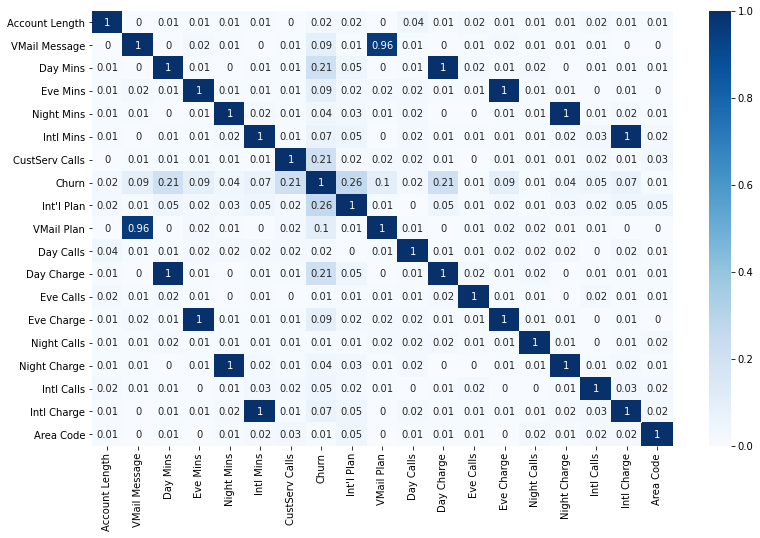

In [ ]:
# Visualizing correlations
plt.figure(figsize=(13,8))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "Blues")

From the heatmap we may infer that there are some variables with a high correlation. These are VMail Message & VMail Plan with correlation equal to 0.96, Day Mins & Day Charge, Eve Mins & Eve Charge, Night Mins & Night Charge, and Intl Mins & Intl Charge with correlation equal to 1.

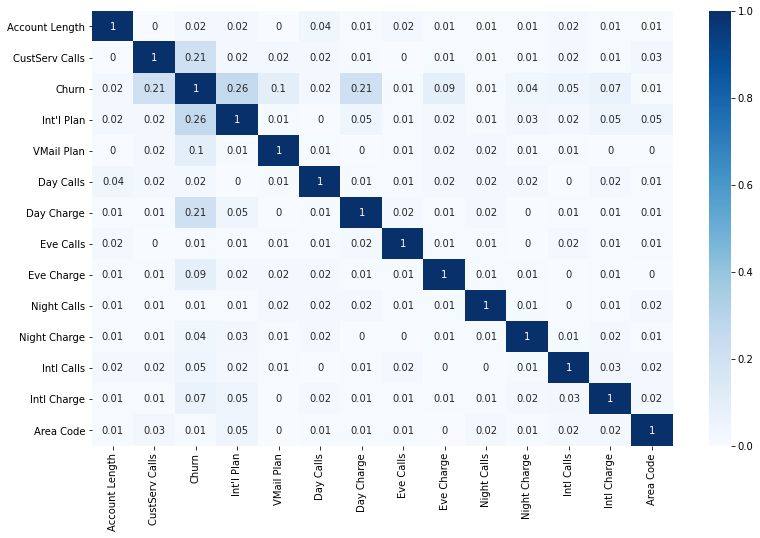

In [ ]:
# Dropping variables that resulted in high correlation in order to have an imporved model
# later, and viewing the updated heatmap.
data.drop(['VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins'], axis=1, inplace=True)
plt.figure(figsize=(13,8))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "Blues")

In [ ]:
num_cols = data.columns[data.dtypes!="O"].tolist()
cat_cols = data.columns[data.dtypes=="O"].tolist()
num_cols.remove('Churn')
print('Numeric columns:' ,'\n',num_cols)
print('Categorical columns: ','\n',cat_cols)

Numeric columns: 
 ['Account Length', 'CustServ Calls', "Int'l Plan", 'VMail Plan', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'Area Code']
Categorical columns:  
 ['State', 'Phone']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


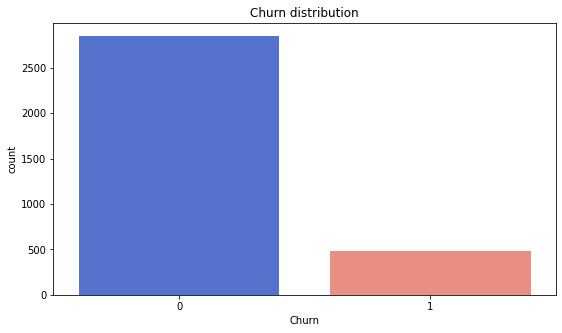

In [ ]:
# Visualising the distribution of churn
plt.figure(figsize=(9,5))
sns.countplot(data.Churn,palette = ['royalblue','salmon'])
plt.title("Churn distribution")
plt.show()

In [ ]:
# Replacing space with underscore in order not to face any problems later
for i in cat_cols:
    data[i] = data[i].apply(lambda x: x.replace(' ','_'))

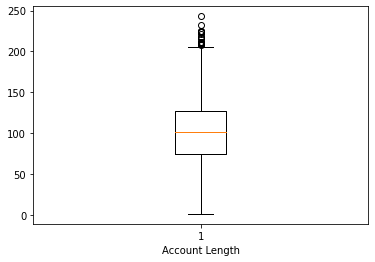

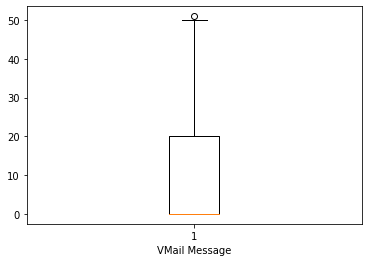

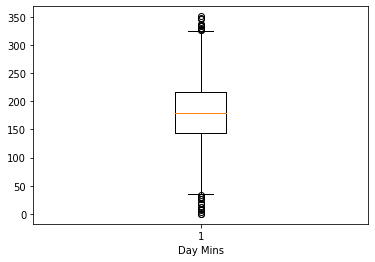

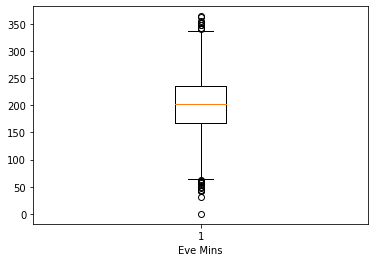

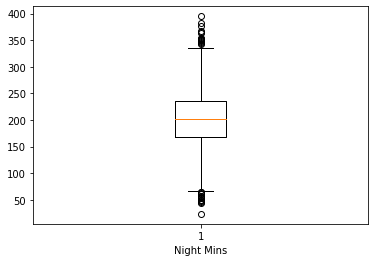

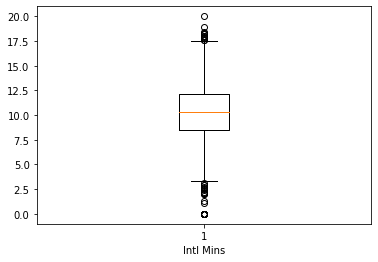

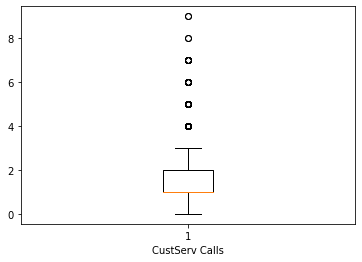

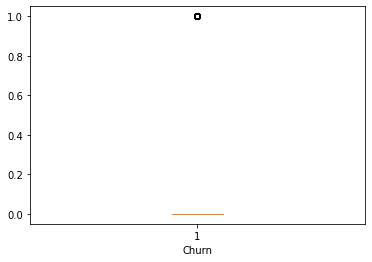

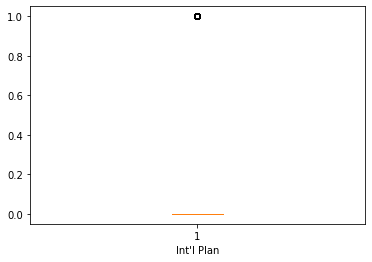

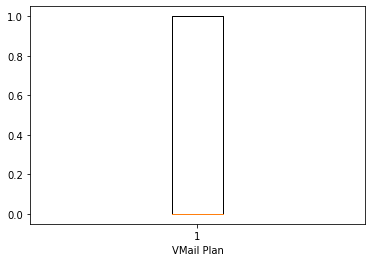

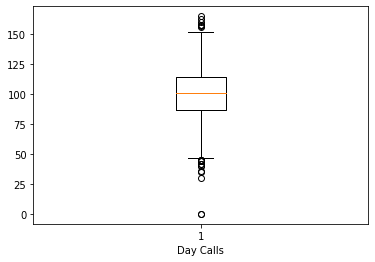

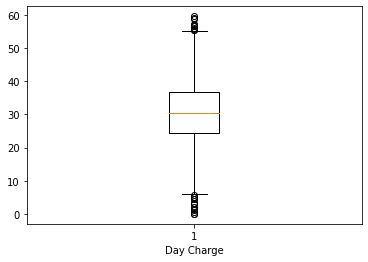

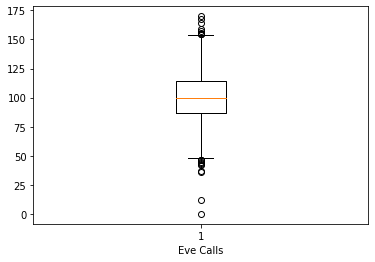

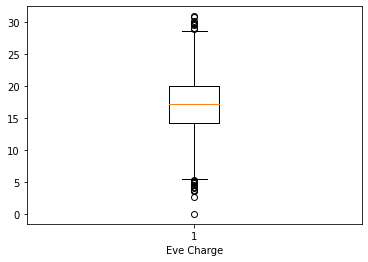

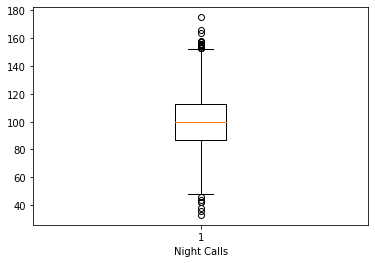

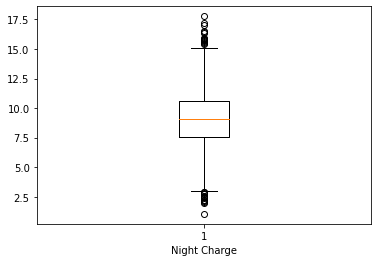

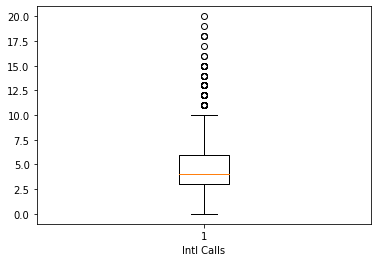

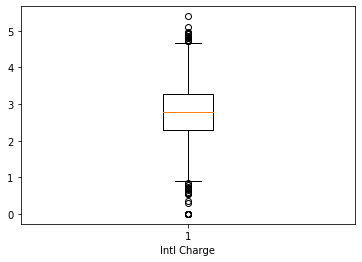

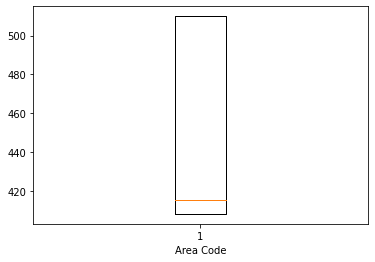

In [ ]:
for i in data_num.columns.tolist():
    plt.boxplot(data_num[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
# 85.5% of customers do not churn, meaning that most probably the new customer
# will be classified as 0.
data.Churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [ ]:
# Building a model
X = data.drop('Churn',axis=1)
Y=data.Churn

In [ ]:
# Getting dummy variables
X=pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# Fitting the model
logit=LogisticRegression(random_state=42)
logit.fit(X0,Y0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Calculating ROC AUC score
print("ROC_AUC Train:",roc_auc_score(Y0,logit.predict_proba(X0)[:,1]*100))
print("ROC_AUC Test:",roc_auc_score(Y1,logit.predict_proba(X1)[:,1]*100))

ROC_AUC Train: 0.7365508207671976
ROC_AUC Test: 0.7764174894217208


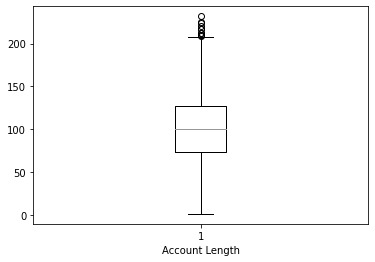

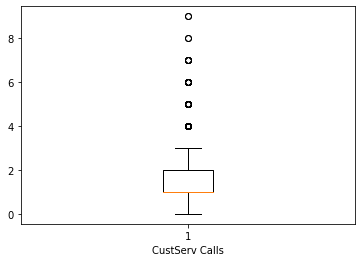

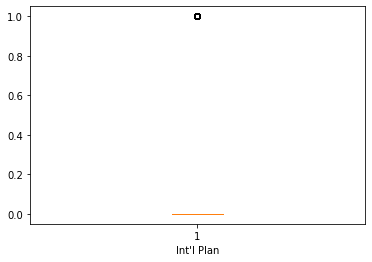

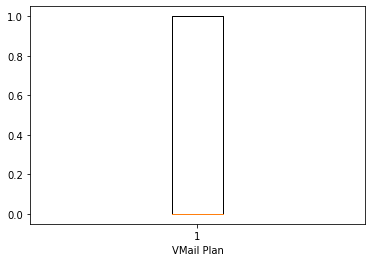

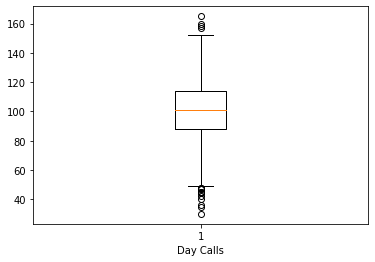

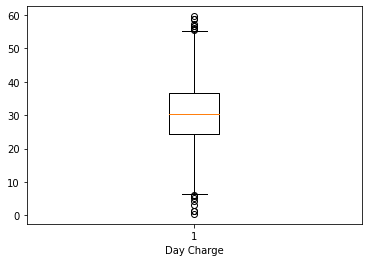

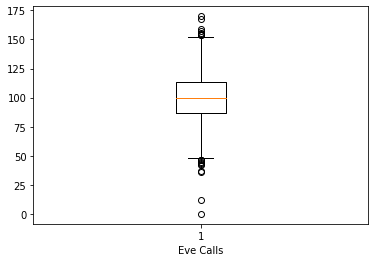

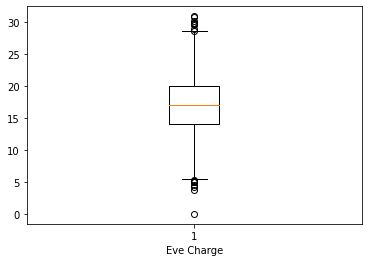

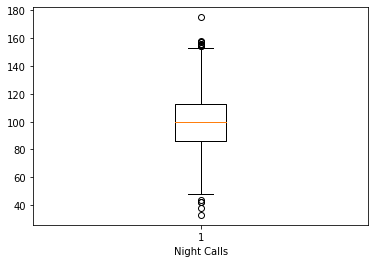

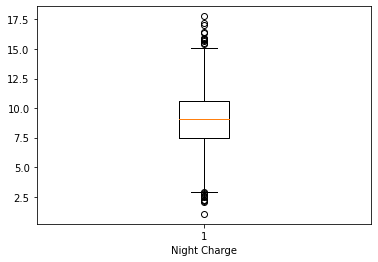

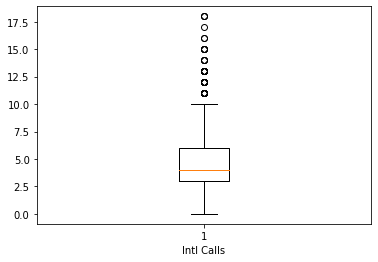

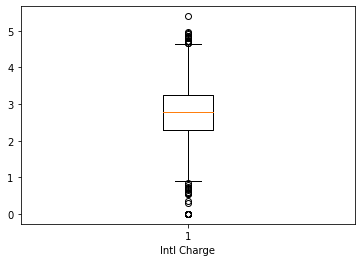

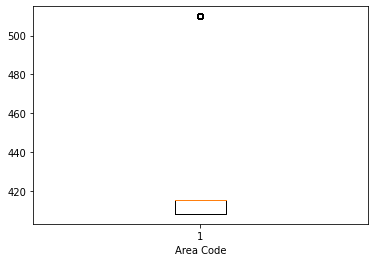

In [ ]:
# Checking whether by removing outliers we can imporve the results of
# our model
for i in num_cols:
    plt.boxplot(X0[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
alpha = 1.5
q3,q2, q1 = np.percentile(X0["Account Length"], [75 ,50,25])
iqr = q3 - q1
print('iqr:',iqr)
print('median:',q2)
lower = q1-iqr
upper = q3+iqr
print(f"based on IQR, the outlier are values bigger than {upper} and lower then {lower}")

iqr: 54.0
median: 100.0
based on IQR, the outlier are values bigger than 181.0 and lower then 19.0


In [ ]:
print('Number of outliers:',  X0[(X0["Account Length"]<lower) | (X0["Account Length"]>upper)].shape)

Number of outliers: (101, 3395)


In [ ]:
Y0_new =  Y0[(X0["Account Length"]>=lower) & (X0["Account Length"]<=upper)]
X0_new =  X0[(X0["Account Length"]>=lower) & (X0["Account Length"]<=upper)]

In [ ]:
logit1 = LogisticRegression(random_state = 42)
logit1.fit(X0_new,Y0_new)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Very slightly, but the results were improved on the test as you can see
print("ROC_AUC Train:",roc_auc_score(Y0_new,logit1.predict_proba(X0_new)[:,1]*100))
print("ROC_AUC Test:",roc_auc_score(Y1,logit1.predict_proba(X1)[:,1]*100))

ROC_AUC Train: 0.7411928585110819
ROC_AUC Test: 0.7784936530324401


In [ ]:
# Checking whether by removing columns we can imporve the results of
# our model

In [ ]:
coefs = pd.DataFrame({'feature':X0.columns.tolist(),'coef':logit.coef_[0].tolist()})
coefs['coef_abs']=coefs.coef.abs()
coefs=coefs.sort_values('coef_abs',ascending=False)

In [ ]:
coefs

,feature,coef,coef_abs
1,CustServ Calls,0.484728,0.484728
2,Int'l Plan,0.243432,0.243432
3,VMail Plan,-0.129079,0.129079
11,Intl Charge,0.113802,0.113802
10,Intl Calls,-0.071129,0.071129
...,...,...,...
2594,Phone_399-6852,0.000000,0.000000
1879,Phone_379-2503,0.000000,0.000000
219,Phone_332-2650,0.000000,0.000000
2598,Phone_399-8615,0.000000,0.000000


In [ ]:
cols_to_drop = coefs[coefs.coef_abs<0.005].feature.tolist()
print(cols_to_drop)

['State_OR', 'State_CA', 'State_NM', 'State_DC', 'State_NE', 'Phone_418-5300', 'State_TN', 'State_DE', 'Phone_399-3083', 'Phone_367-1681', 'Phone_368-7555', 'Phone_360-1171', 'Phone_380-7816', 'Phone_376-9607', 'Phone_366-5829', 'Phone_405-4109', 'Phone_411-4714', 'Phone_386-4170', 'Phone_397-1766', 'Phone_380-4374', 'Phone_377-4975', 'Phone_384-5632', 'Phone_375-4107', 'Phone_374-8329', 'Phone_403-9719', 'Phone_330-2635', 'Phone_364-9040', 'Phone_390-5055', 'Phone_415-6347', 'Phone_340-1876', 'Phone_385-7148', 'Phone_380-4080', 'Phone_402-6744', 'Phone_414-8718', 'Phone_333-9002', 'Phone_415-4564', 'Phone_397-3746', 'Phone_363-1069', 'Phone_364-7644', 'Phone_383-6029', 'Phone_384-3299', 'Phone_346-2020', 'Phone_417-3999', 'Phone_368-1288', 'Phone_408-4529', 'Phone_349-3112', 'Phone_338-6714', 'Phone_406-9926', 'Phone_348-4660', 'Phone_345-1524', 'Phone_332-6139', 'Phone_410-3159', 'Phone_373-8483', 'Phone_368-7706', 'Phone_327-3587', 'Phone_372-4868', 'Phone_393-7984', 'Phone_348-7193

In [ ]:
X0_small = X0.drop(cols_to_drop,axis=1)
X1_small = X1.drop(cols_to_drop,axis=1)

In [ ]:
logit2 = LogisticRegression(random_state = 42)
logit2.fit(X0_small,Y0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# As we can see, the results became inconsistent. Our test increased, but now
# it is bigger than train, meaning that maybe if we make the train/test split 50%
# the results will be back to normal.
print("ROC_AUC Train:",roc_auc_score(Y0,logit2.predict_proba(X0_small)[:,1]*100))
print("ROC_AUC Test:",roc_auc_score(Y1,logit2.predict_proba(X1_small)[:,1]*100))

ROC_AUC Train: 0.7764228066558987
ROC_AUC Test: 0.7905105782792665


In [ ]:
# As a conclusion, as our winning model we are choosing logit1 based on the results
# of calculated ROC AUC, since the test performed sightly better there rather than on initial
# model